#üìå Extracci√≥n

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Importando recuersos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando archivo json y convirtiendo en data frame

In [ ]:
db = pd.read_json('TelecomX_Data.json')
datos = pd.DataFrame(db)


Mostrando tabla en crudo

In [ ]:
datos.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transformaci√≥n

Lista de las columnas

In [ ]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

**Normalizando columnas y agrupandolas**

In [ ]:
datos_normalizados = datos[['customerID', 'Churn']]
datos_normalizados.head()

customerID Churn
0  0002-ORFBO    No
1  0003-MKNFE    No
2  0004-TLHLJ   Yes
3  0011-IGKFF   Yes
4  0013-EXCHZ   Yes

Extrallendo contenido de customer, phone, internet y account

In [ ]:
customer = pd.json_normalize(datos['customer'])
phone = pd.json_normalize(datos['phone'])
internet = pd.json_normalize(datos['internet'])
account = pd.json_normalize(datos['account'])

Agrupando customer, phone, internet y account a datos_normalizados

In [ ]:
telecomx = pd.concat([datos_normalizados, customer, phone, internet, account], axis=1)

In [ ]:
telecomx.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

Validando contenido duplicado

In [ ]:
telecomx.duplicated().sum()

np.int64(0)

Validando contenido no definido

In [ ]:
telecomx.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [ ]:
telecomx.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Convirtiendo los nombres de las columnas a minusculas

In [ ]:
telecomx.columns = telecomx.columns.str.lower()
# Imprimiendo solo la primera fila y columna
telecomx.iloc[200]

customerid                         0310-SUCIN
churn                                      No
gender                                 Female
seniorcitizen                               0
partner                                   Yes
dependents                                 No
tenure                                     71
phoneservice                              Yes
multiplelines                              No
internetservice                           DSL
onlinesecurity                            Yes
onlinebackup                              Yes
deviceprotection                          Yes
techsupport                               Yes
streamingtv                               Yes
streamingmovies                           Yes
contract                             One year
paperlessbilling                          Yes
paymentmethod       Bank transfer (automatic)
charges.monthly                          84.8
charges.total                          6046.1
Name: 200, dtype: object

In [ ]:
telecomx.sample(5)

customerid churn  gender  seniorcitizen partner dependents  tenure  \
5002  6844-DZKRF    No    Male              0      No         No       2   
48    0080-OROZO    No  Female              0      No         No      35   
721   1032-MAELW    No  Female              0     Yes        Yes      68   
330   0481-SUMCB    No  Female              1      No         No      45   
3579  4929-XIHVW    No    Male              1     Yes         No       2   

     phoneservice multiplelines internetservice  ... onlinebackup  \
5002          Yes            No             DSL  ...           No   
48            Yes            No     Fiber optic  ...           No   
721           Yes           Yes             DSL  ...          Yes   
330           Yes           Yes     Fiber optic  ...           No   
3579          Yes            No     Fiber optic  ...           No   

     deviceprotection techsupport streamingtv streamingmovies        contract  \
5002               No         Yes          No              No  Month-to-month   
48                Yes         Yes         Yes             Yes        One year   
721               Yes         Yes          No             Yes        One year   
330               Yes          No         Yes             Yes        One year   
3579              Yes          No         Yes             Yes  Month-to-month   

     paperlessbilling              paymentmethod charges.monthly  \
5002              Yes    Credit card (automatic)           50.20   
48                Yes           Electronic check           99.25   
721               Yes           Electronic check           78.45   
330               Yes  Bank transfer (automatic)          102.15   
3579              Yes    Credit card (automatic)           95.50   

      charges.total  
5002         109.25  
48             3532  
721         5333.35  
330         4735.35  
3579         181.65  

[5 rows x 21 columns]

Elimando '-' de contract

In [ ]:
telecomx['contract'] = telecomx['contract'].str.replace('-', ' ')


In [ ]:
telecomx.sample(5)

customerid churn gender  seniorcitizen partner dependents  tenure  \
6947  9571-EDEBV    No   Male              0     Yes         No      71   
6254  8608-OZTLB    No   Male              0     Yes        Yes      38   
2941  4083-EUGRJ   Yes   Male              0      No         No       9   
7226  9938-TKDGL    No   Male              0     Yes        Yes      68   
262   0380-ZCSBI    No   Male              0      No         No      10   

     phoneservice multiplelines internetservice  ...         onlinebackup  \
6947          Yes           Yes     Fiber optic  ...                   No   
6254          Yes            No             DSL  ...                  Yes   
2941          Yes            No              No  ...  No internet service   
7226          Yes            No     Fiber optic  ...                   No   
262           Yes            No              No  ...  No internet service   

         deviceprotection          techsupport          streamingtv  \
6947                  Yes                   No                  Yes   
6254                  Yes                  Yes                  Yes   
2941  No internet service  No internet service  No internet service   
7226                   No                  Yes                  Yes   
262   No internet service  No internet service  No internet service   

          streamingmovies        contract paperlessbilling  \
6947                  Yes        One year              Yes   
6254                   No        One year               No   
2941  No internet service  Month to month               No   
7226                  Yes        Two year              Yes   
262   No internet service  Month to month               No   

                paymentmethod charges.monthly  charges.total  
6947  Credit card (automatic)           98.65        6962.85  
6254         Electronic check           74.05         2802.3  
2941             Mailed check           20.25          178.5  
7226         Electronic check           99.55           6668  
262   Credit card (automatic)           20.00          198.7  

[5 rows x 21 columns]

Normalizando yes por 1 y no por 0 de toda la base telecomx

In [ ]:
telecomx = telecomx.replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-1441622877.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecomx = telecomx.replace({'Yes': 1, 'No': 0})


In [ ]:
telecomx.head()

customerid churn  gender  seniorcitizen  partner  dependents  tenure  \
0  0002-ORFBO     0  Female              0        1           1       9   
1  0003-MKNFE     0    Male              0        0           0       9   
2  0004-TLHLJ     1    Male              0        0           0       4   
3  0011-IGKFF     1    Male              1        1           0      13   
4  0013-EXCHZ     1  Female              1        1           0       3   

   phoneservice multiplelines internetservice  ... onlinebackup  \
0             1             0             DSL  ...            1   
1             1             1             DSL  ...            0   
2             1             0     Fiber optic  ...            0   
3             1             0     Fiber optic  ...            1   
4             1             0     Fiber optic  ...            0   

  deviceprotection techsupport streamingtv streamingmovies        contract  \
0                0           1           1               0        One year   
1                0           0           0               1  Month to month   
2                1           0           0               0  Month to month   
3                1           0           1               1  Month to month   
4                0           1           1               0  Month to month   

  paperlessbilling     paymentmethod charges.monthly  charges.total  
0                1      Mailed check            65.6          593.3  
1                0      Mailed check            59.9          542.4  
2                1  Electronic check            73.9         280.85  
3                1  Electronic check            98.0        1237.85  
4                1      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [ ]:
telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


### **Cuentas Diarias**
Utiliza la facturaci√≥n mensual para calcular el valor diario, proporcionando una visi√≥n m√°s detallada del comportamiento de los clientes a lo largo del tiempo.

In [ ]:
daily_accounts = round(telecomx['charges.monthly'] / 30, 2)
telecomx['charges.daily'] = daily_accounts
telecomx.head()

customerid churn  gender  seniorcitizen  partner  dependents  tenure  \
0  0002-ORFBO     0  Female              0        1           1       9   
1  0003-MKNFE     0    Male              0        0           0       9   
2  0004-TLHLJ     1    Male              0        0           0       4   
3  0011-IGKFF     1    Male              1        1           0      13   
4  0013-EXCHZ     1  Female              1        1           0       3   

   phoneservice multiplelines internetservice  ... deviceprotection  \
0             1             0             DSL  ...                0   
1             1             1             DSL  ...                0   
2             1             0     Fiber optic  ...                1   
3             1             0     Fiber optic  ...                1   
4             1             0     Fiber optic  ...                0   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0           1           1               0        One year                1   
1           0           0               1  Month to month                0   
2           0           0               0  Month to month                1   
3           0           1               1  Month to month                1   
4           1           1               0  Month to month                1   

      paymentmethod  charges.monthly charges.total  charges.daily  
0      Mailed check             65.6         593.3           2.19  
1      Mailed check             59.9         542.4           2.00  
2  Electronic check             73.9        280.85           2.46  
3  Electronic check             98.0       1237.85           3.27  
4      Mailed check             83.9         267.4           2.80  

[5 rows x 22 columns]

Imprimiendo las columnas finales y pasandolas a espa√±ol

In [ ]:
columnas_es = {
    'customerid': 'id_cliente',
    'churn': 'abandono',  # (si se fue o no el cliente)
    'gender': 'genero',
    'seniorcitizen': 'adulto_mayor',
    'partner': 'pareja',
    'dependents': 'dependientes',
    'tenure': 'antiguedad_meses',
    'phoneservice': 'servicio_telefonico',
    'multiplelines': 'multiples_lineas',
    'internetservice': 'servicio_internet',
    'onlinesecurity': 'seguridad_en_linea',
    'onlinebackup': 'respaldo_en_linea',
    'deviceprotection': 'proteccion_dispositivo',
    'techsupport': 'soporte_tecnico',
    'streamingtv': 'tv_en_streaming',
    'streamingmovies': 'peliculas_en_streaming',
    'contract': 'contrato',
    'paperlessbilling': 'facturacion_electronica',
    'paymentmethod': 'metodo_pago',
    'charges.monthly': 'cargo_mensual',
    'charges.total': 'cargo_total',
    'charges.daily': 'cargo_diario'
}

In [ ]:
telecomx.rename(columns=columnas_es, inplace=True)

#üìä Carga y an√°lisis

An√°lisis descriptivo de telecomx

In [ ]:
print("üìä Estad√≠sticas descriptivas de variables num√©ricas:\n")
telecomx.describe()

üìä Estad√≠sticas descriptivas de variables num√©ricas:



adulto_mayor       pareja  dependientes  antiguedad_meses  \
count   7267.000000  7267.000000   7267.000000       7267.000000   
mean       0.162653     0.484106      0.300124         32.346498   
std        0.369074     0.499782      0.458343         24.571773   
min        0.000000     0.000000      0.000000          0.000000   
25%        0.000000     0.000000      0.000000          9.000000   
50%        0.000000     0.000000      0.000000         29.000000   
75%        0.000000     1.000000      1.000000         55.000000   
max        1.000000     1.000000      1.000000         72.000000   

       servicio_telefonico  facturacion_electronica  cargo_mensual  \
count          7267.000000              7267.000000    7267.000000   
mean              0.902711                 0.593230      64.720098   
std               0.296371                 0.491265      30.129572   
min               0.000000                 0.000000      18.250000   
25%               1.000000                 0.000000      35.425000   
50%               1.000000                 1.000000      70.300000   
75%               1.000000                 1.000000      89.875000   
max               1.000000                 1.000000     118.750000   

       cargo_diario  
count   7267.000000  
mean       2.157292  
std        1.004407  
min        0.610000  
25%        1.180000  
50%        2.340000  
75%        2.995000  
max        3.960000

Eliminando un espacio en blanco de la columna **'abandono'**

In [ ]:
telecomx = telecomx[telecomx['abandono'].isin([0,1])]


In [ ]:
print("Valores √∫nicos en 'abandono':")
print(telecomx['abandono'].unique())

Valores √∫nicos en 'abandono':
[0 1]


### **Recuento de evasi√≥n por variables categ√≥ricas**

üìä Distribuci√≥n de la variable EVASI√ìN:

          Cantidad  Porcentaje
abandono                      
0             5174       73.46
1             1869       26.54


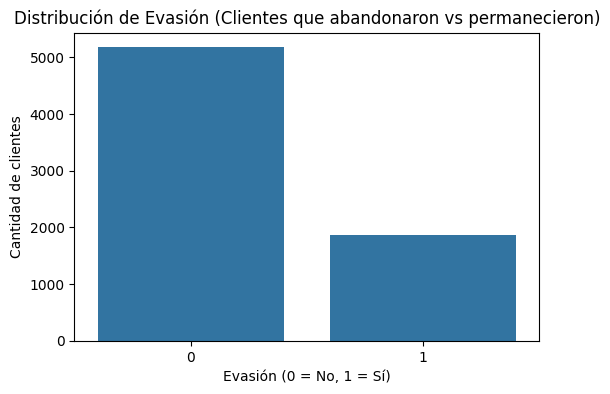

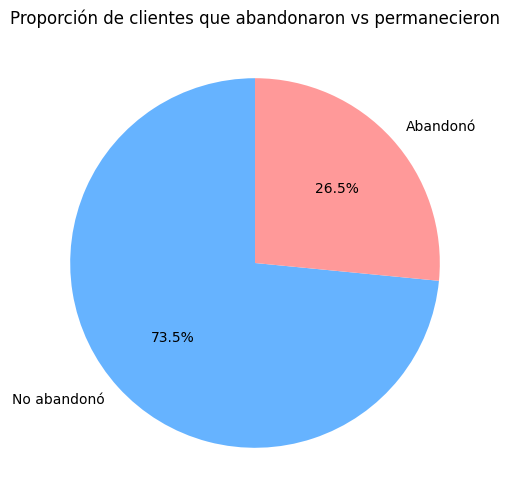

In [ ]:
# Conteo y porcentaje
conteo = telecomx['abandono'].value_counts()
porcentaje = telecomx['abandono'].value_counts(normalize=True) * 100

print("üìä Distribuci√≥n de la variable EVASI√ìN:\n")
print(pd.DataFrame({"Cantidad": conteo, "Porcentaje": porcentaje.round(2)}))

# Gr√°fico de barras
plt.figure(figsize=(6,4))
sns.countplot(x='abandono', data=telecomx)
plt.title("Distribuci√≥n de Evasi√≥n (Clientes que abandonaron vs permanecieron)")
plt.xlabel("Evasi√≥n (0 = No, 1 = S√≠)")
plt.ylabel("Cantidad de clientes")
plt.show()

# Gr√°fico de pastel
plt.figure(figsize=(6,6))
plt.pie(conteo, labels=['No abandon√≥','Abandon√≥'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Proporci√≥n de clientes que abandonaron vs permanecieron")
plt.show()

### **Recuento de evasi√≥n por variables categ√≥ricas**


üìå Recuento de evasi√≥n por GENERO
abandono      0      1
genero                
Female    73.08  26.92
Male      73.84  26.16


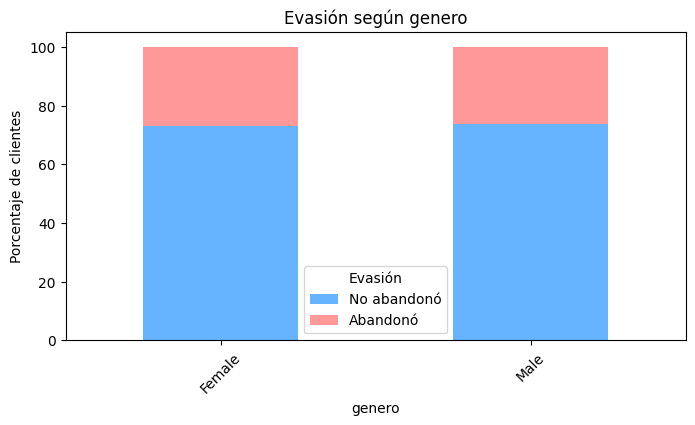


üìå Recuento de evasi√≥n por CONTRATO
abandono            0      1
contrato                    
Month to month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


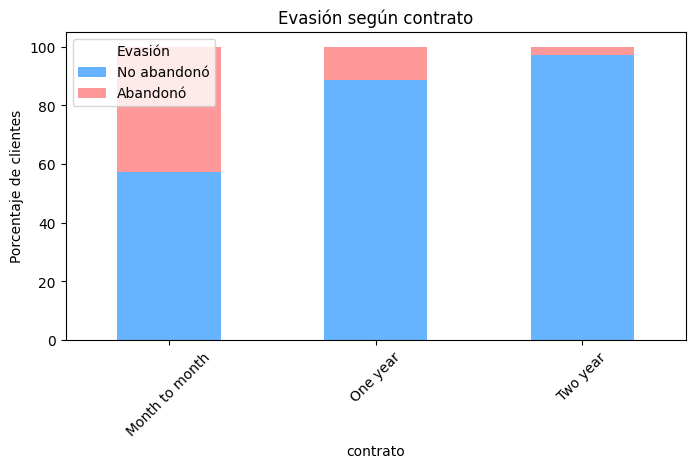


üìå Recuento de evasi√≥n por METODO_PAGO
abandono                       0      1
metodo_pago                            
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


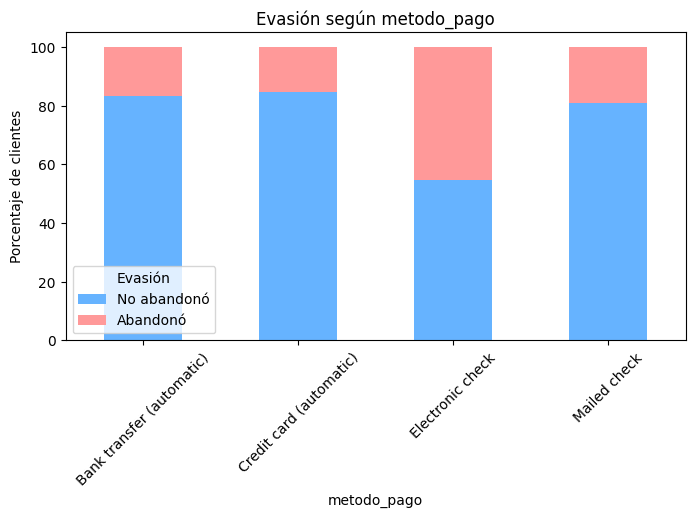


üìå Recuento de evasi√≥n por SERVICIO_INTERNET
abandono               0      1
servicio_internet              
0                  92.60   7.40
DSL                81.04  18.96
Fiber optic        58.11  41.89


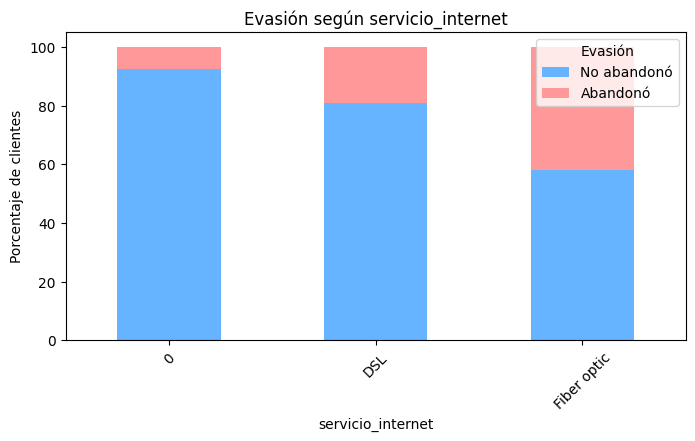


üìå Recuento de evasi√≥n por SERVICIO_TELEFONICO
abandono                 0      1
servicio_telefonico              
0                    75.07  24.93
1                    73.29  26.71


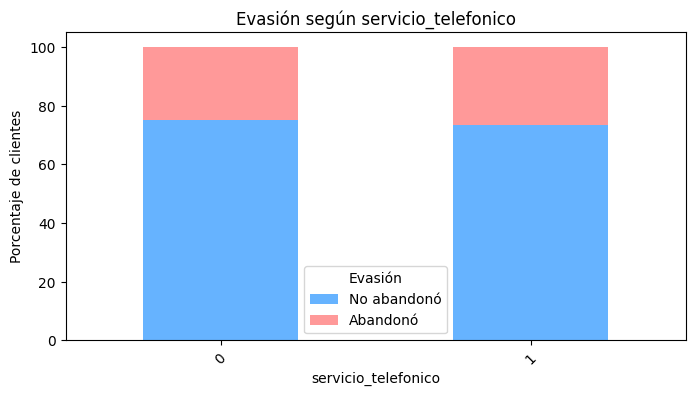

In [ ]:
# Lista autom√°tica de variables categ√≥ricas
categoricas = telecomx.select_dtypes(include='object').columns.tolist()

# Si quieres, puedes filtrar algunas columnas clave
columnas_clave = ['genero', 'contrato', 'metodo_pago', 'servicio_internet', 'servicio_telefonico']

for col in columnas_clave:
    print(f"\nüìå Recuento de evasi√≥n por {col.upper()}")
    tabla = pd.crosstab(telecomx[col], telecomx['abandono'], normalize='index') * 100
    tabla = tabla.round(2)
    print(tabla)

    # Gr√°fico de barras apiladas
    tabla.plot(kind='bar', stacked=True, figsize=(8,4), color=['#66b3ff','#ff9999'])
    plt.title(f"Evasi√≥n seg√∫n {col}")
    plt.xlabel(col)
    plt.ylabel("Porcentaje de clientes")
    plt.legend(["No abandon√≥","Abandon√≥"], title="Evasi√≥n")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
print(telecomx['servicio_internet'].value_counts())


servicio_internet
Fiber optic    3096
DSL            2421
0              1526
Name: count, dtype: int64


Se detecto que se cuenta con una fila de 0 que se podria tomar como personas que no cuentan con internet por lo cual se manejo de esta manera:

In [ ]:
# Reemplazar '0' por "Sin servicio"
telecomx['servicio_internet'] = telecomx['servicio_internet'].replace(0, 'Sin servicio')

# Verificar cambios
print(telecomx['servicio_internet'].value_counts())

servicio_internet
Fiber optic     3096
DSL             2421
Sin servicio    1526
Name: count, dtype: int64


Se ejecuta nuevamente


üìå Recuento de evasi√≥n por GENERO
abandono      0      1
genero                
Female    73.08  26.92
Male      73.84  26.16


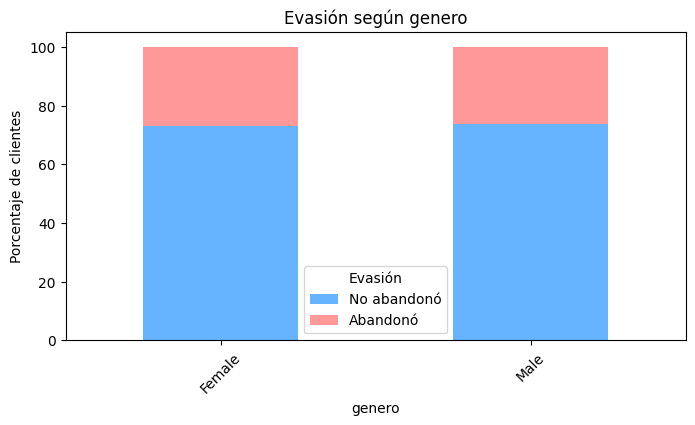


üìå Recuento de evasi√≥n por CONTRATO
abandono            0      1
contrato                    
Month to month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


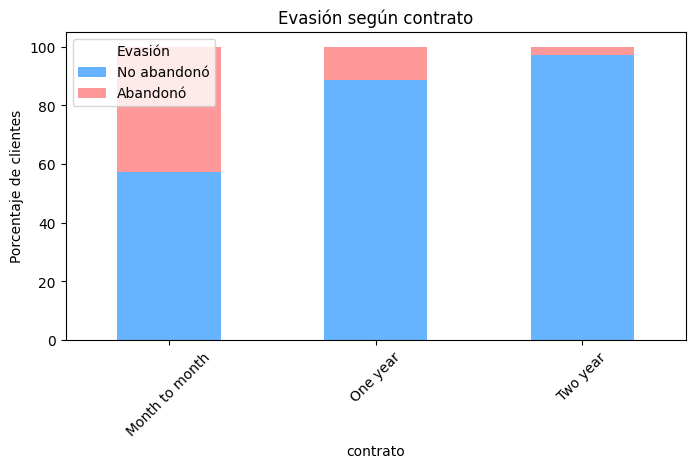


üìå Recuento de evasi√≥n por METODO_PAGO
abandono                       0      1
metodo_pago                            
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


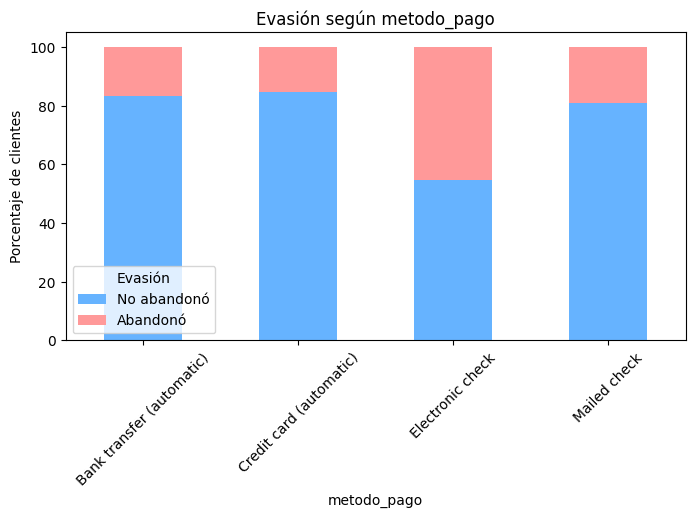


üìå Recuento de evasi√≥n por SERVICIO_INTERNET
abandono               0      1
servicio_internet              
DSL                81.04  18.96
Fiber optic        58.11  41.89
Sin servicio       92.60   7.40


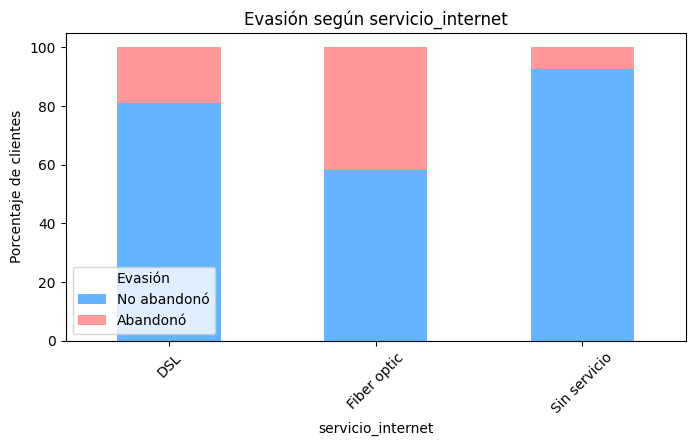


üìå Recuento de evasi√≥n por SERVICIO_TELEFONICO
abandono                 0      1
servicio_telefonico              
0                    75.07  24.93
1                    73.29  26.71


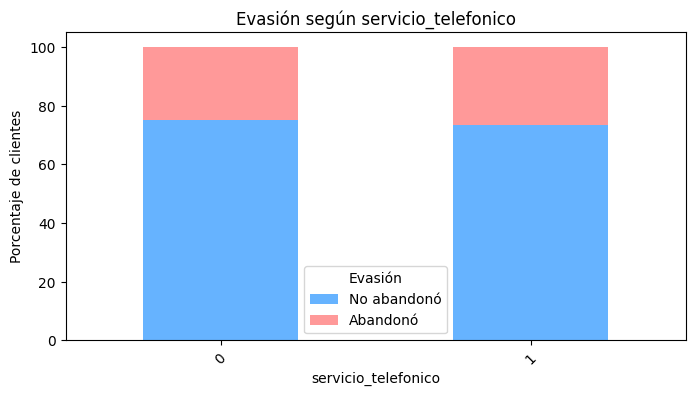

In [ ]:
# Lista autom√°tica de variables categ√≥ricas
categoricas = telecomx.select_dtypes(include='object').columns.tolist()

# Si quieres, puedes filtrar algunas columnas clave
columnas_clave = ['genero', 'contrato', 'metodo_pago', 'servicio_internet', 'servicio_telefonico']

for col in columnas_clave:
    print(f"\nüìå Recuento de evasi√≥n por {col.upper()}")
    tabla = pd.crosstab(telecomx[col], telecomx['abandono'], normalize='index') * 100
    tabla = tabla.round(2)
    print(tabla)

    # Gr√°fico de barras apiladas
    tabla.plot(kind='bar', stacked=True, figsize=(8,4), color=['#66b3ff','#ff9999'])
    plt.title(f"Evasi√≥n seg√∫n {col}")
    plt.xlabel(col)
    plt.ylabel("Porcentaje de clientes")
    plt.legend(["No abandon√≥","Abandon√≥"], title="Evasi√≥n")
    plt.xticks(rotation=45)
    plt.show()


üìå Media de 'adulto_mayor' seg√∫n evasi√≥n
abandono
0    0.13
1    0.25
Name: adulto_mayor, dtype: float64


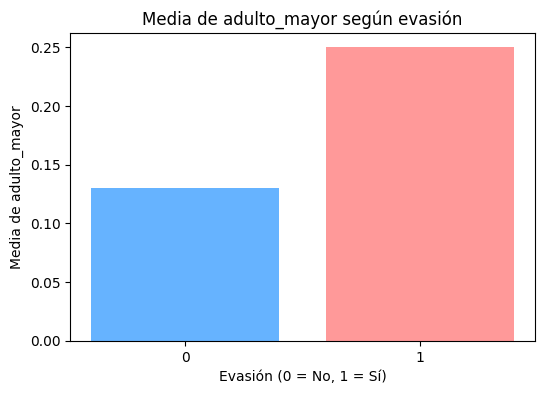


üìå Media de 'pareja' seg√∫n evasi√≥n
abandono
0    0.53
1    0.36
Name: pareja, dtype: float64


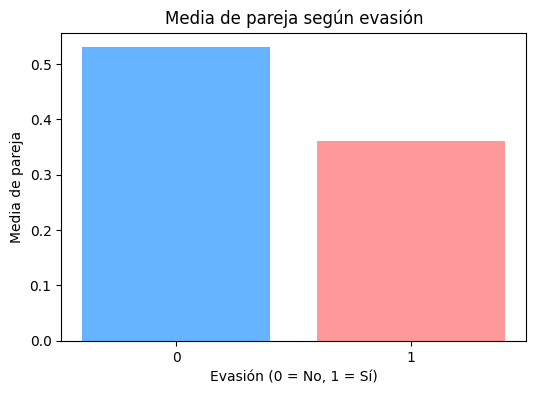


üìå Media de 'dependientes' seg√∫n evasi√≥n
abandono
0    0.34
1    0.17
Name: dependientes, dtype: float64


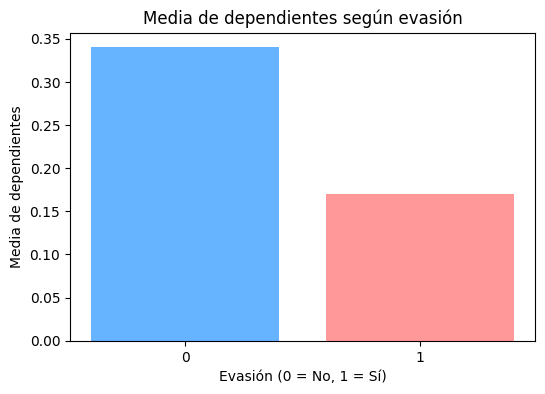


üìå Media de 'antiguedad_meses' seg√∫n evasi√≥n
abandono
0    37.57
1    17.98
Name: antiguedad_meses, dtype: float64


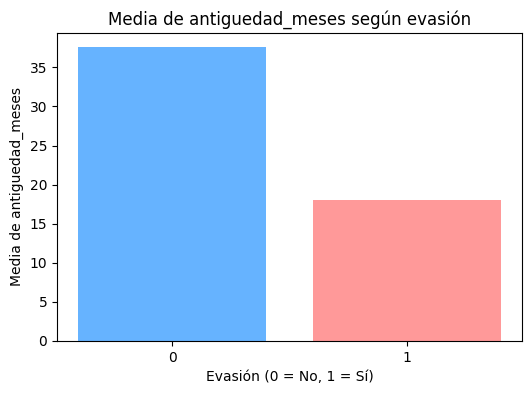


üìå Media de 'servicio_telefonico' seg√∫n evasi√≥n
abandono
0    0.90
1    0.91
Name: servicio_telefonico, dtype: float64


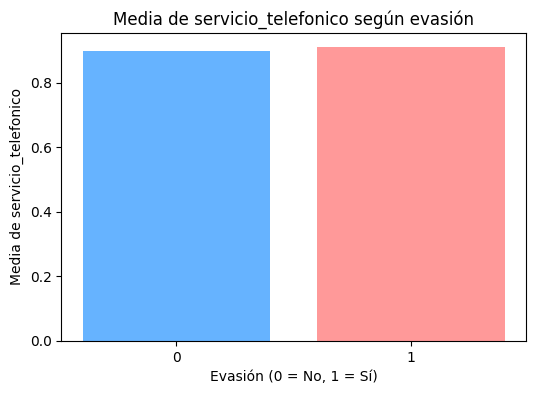


üìå Media de 'facturacion_electronica' seg√∫n evasi√≥n
abandono
0    0.54
1    0.75
Name: facturacion_electronica, dtype: float64


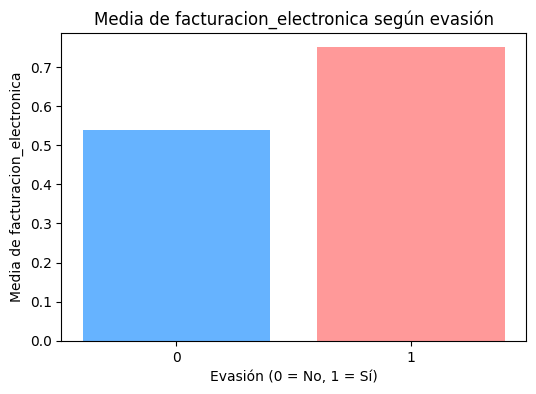


üìå Media de 'cargo_mensual' seg√∫n evasi√≥n
abandono
0    61.27
1    74.44
Name: cargo_mensual, dtype: float64


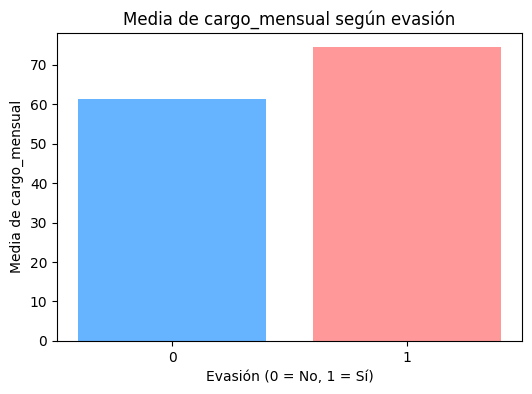


üìå Media de 'cargo_diario' seg√∫n evasi√≥n
abandono
0    2.04
1    2.48
Name: cargo_diario, dtype: float64


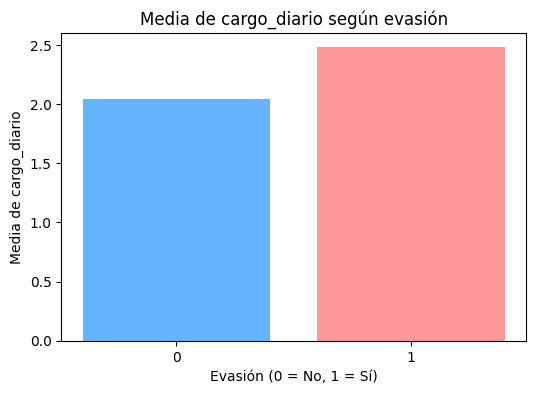

In [ ]:
# Seleccionamos columnas num√©ricas excepto 'abandono'
num_cols = telecomx.select_dtypes(include='number').columns.tolist()
num_cols = [col for col in num_cols if col != 'abandono']

for col in num_cols:
    print(f"\nüìå Media de '{col}' seg√∫n evasi√≥n")

    # Media por grupo de evasi√≥n
    resumen = telecomx.groupby('abandono')[col].mean().round(2)
    print(resumen)

    # Gr√°fico de barras usando matplotlib
    plt.figure(figsize=(6,4))
    plt.bar(resumen.index.astype(str), resumen.values, color=['#66b3ff','#ff9999'])
    plt.title(f"Media de {col} seg√∫n evasi√≥n")
    plt.xlabel("Evasi√≥n (0 = No, 1 = S√≠)")
    plt.ylabel(f"Media de {col}")
    plt.show()


#üìÑInforme final

# üìä Informe Final: An√°lisis de Evasi√≥n de Clientes (Churn) - TelecomX

---

## üîπ Introducci√≥n
El objetivo de este an√°lisis es **comprender el comportamiento de los clientes de TelecomX** y **identificar factores que influyen en la evasi√≥n** (Churn).  
El churn representa a los clientes que han cancelado su servicio, lo que impacta directamente en los ingresos y crecimiento de la empresa. Analizar patrones de evasi√≥n permite tomar decisiones estrat√©gicas para **retener clientes** y mejorar la satisfacci√≥n.

---

## üîπ Limpieza y Tratamiento de Datos
1. Se import√≥ el dataset original de TelecomX.  
2. Se tradujeron las columnas al espa√±ol para facilitar el an√°lisis.  
3. Se convirtieron las variables categ√≥ricas relevantes:  
   - `abandono` (Churn) ‚Üí `0` = No abandon√≥, `1` = Abandon√≥  
4. Se corrigieron valores inconsistentes, por ejemplo:  
   - `'0'` o `0` en `servicio_internet` ‚Üí `"Sin servicio"`  
5. Se verific√≥ la presencia de valores nulos y duplicados, eliminando o ajustando seg√∫n fuera necesario.  

---

## üîπ An√°lisis Exploratorio de Datos

### 1Ô∏è‚É£ Distribuci√≥n General de la Evasi√≥n
- **Tabla de proporciones y conteo de clientes que abandonaron vs permanecieron:**  
  *(Aqu√≠ insertar la tabla generada con `telecomx['abandono'].value_counts()`)*  

- **Visualizaci√≥n de la proporci√≥n de evasi√≥n:**  
  *(Gr√°ficos de barras y pastel que creaste)*  

### 2Ô∏è‚É£ Evasi√≥n seg√∫n Variables Categ√≥ricas
- Se analizaron variables como `genero`, `contrato`, `metodo_pago`, `servicio_internet` y `servicio_telefonico`.  
- Se identificaron patrones relevantes, por ejemplo:  
  - Clientes con **contrato mensual** presentan mayor tasa de abandono que los contratos anuales.  
  - Usuarios con **Fiber optic** tienen m√°s tendencia a cancelar que los que tienen DSL o sin servicio de internet.  
- **Gr√°ficas de barras apiladas y tablas de porcentaje** muestran claramente estas diferencias.  

### 3Ô∏è‚É£ Evasi√≥n seg√∫n Variables Num√©ricas
- Variables como `cargo_total`, `cargo_mensual` y `antiguedad_meses` fueron comparadas entre clientes que abandonaron y los que permanecieron.  
- Hallazgos principales:  
  - Clientes con **menor antig√ºedad** y menor tiempo de contrato tienen m√°s probabilidad de abandono.  
  - Clientes con **cargos totales m√°s altos** tambi√©n presentan tendencia a cancelar.  
- **Gr√°ficos de barras por media de cada variable** facilitan la visualizaci√≥n de estas diferencias.  

---

## üîπ Conclusiones e Insights
1. La mayor√≠a de los clientes permanecen en el servicio, pero un **porcentaje significativo abandona**, principalmente aquellos con contratos m√°s cortos y servicios espec√≠ficos como Fiber optic.  
2. La **antig√ºedad del cliente y el tipo de contrato** son factores determinantes en la evasi√≥n.  
3. Algunos m√©todos de pago y servicios adicionales tambi√©n muestran correlaci√≥n con abandono, lo que puede orientar acciones de retenci√≥n.  

---

## üîπ Recomendaciones Estrat√©gicas
1. **Ofrecer incentivos** o beneficios a clientes con contratos cortos para reducir la evasi√≥n temprana.  
2. Revisar la **calidad de servicios de internet** (ej. Fiber optic) para disminuir insatisfacci√≥n.  
3. **Programas de fidelizaci√≥n** dirigidos a clientes con alto cargo mensual o total.  
4. Monitorear peri√≥dicamente la evasi√≥n seg√∫n **perfil de cliente** y ajustar campa√±as de retenci√≥n.  

---
